In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

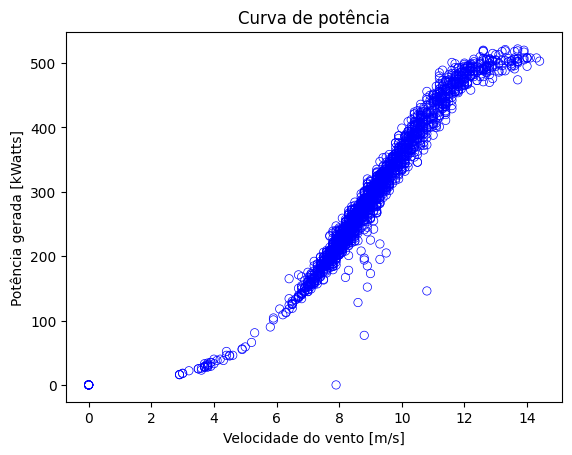

In [41]:
data = np.loadtxt('aerogerador.dat')

v_aero = data[:, 0]
P = data[:, 1]

# Cria o scatterplot
plt.scatter(v_aero, P, color='blue', marker='o', facecolors='none', edgecolors='blue', linewidths=0.5)

# Adiciona rótulos e título
plt.xlabel('Velocidade do vento [m/s]')
plt.ylabel('Potência gerada [kWatts]')
plt.title('Curva de potência')

# Exibe o gráfico
plt.show()

In [42]:
def r2(y, erro):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - SEQ/Syy

def r2_ajustado(y, erro, n, p):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - (SEQ / Syy) * ((n - 1) / (n - p - 1))

def aic(v, k, erro):
    SEQ = np.sum(erro ** 2)
    return (len(v) * np.log(SEQ)) + 2*k

Melhor posição: [ 0.04215525 -0.99586107  6.71023958 -5.69883629 -6.         -6.        ]
Melhor aptidão: 187746.22258540755


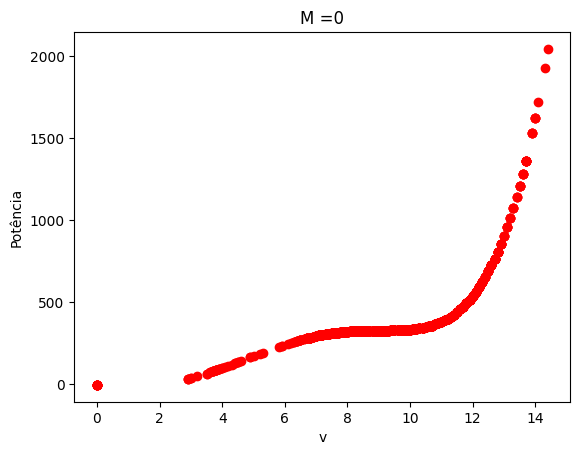

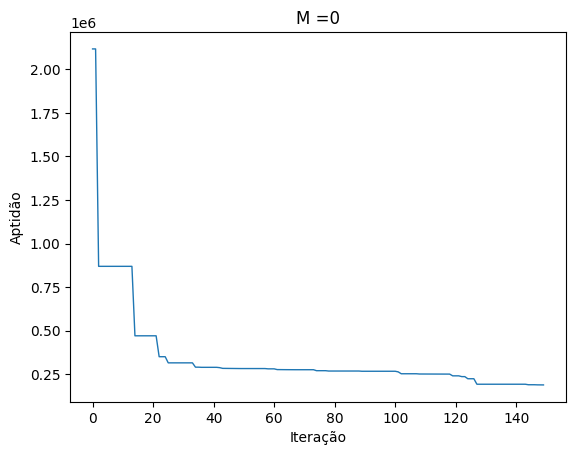

Melhor posição: [-7.22626936e-03  1.97562357e-01 -1.84986262e+00  1.00000000e+01
 -6.00000000e+00  9.24252517e+00]
Melhor aptidão: 30224.560051425266


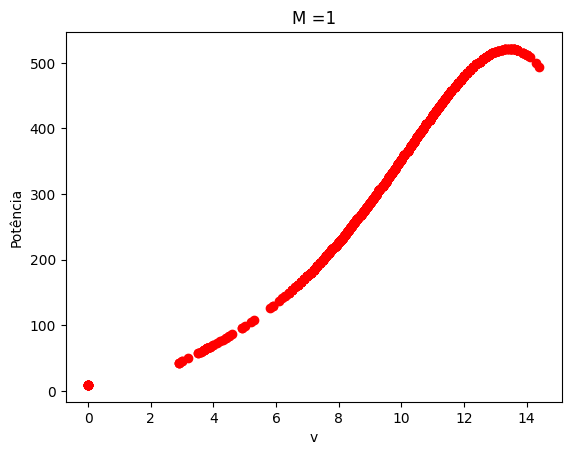

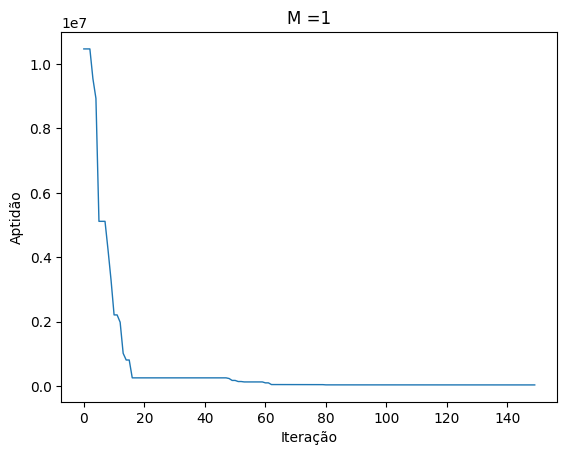

Melhor posição: [ 0.01740808 -0.47446481  3.99734472 -5.9533907  -6.          4.8637025 ]
Melhor aptidão: 64935.13470534671


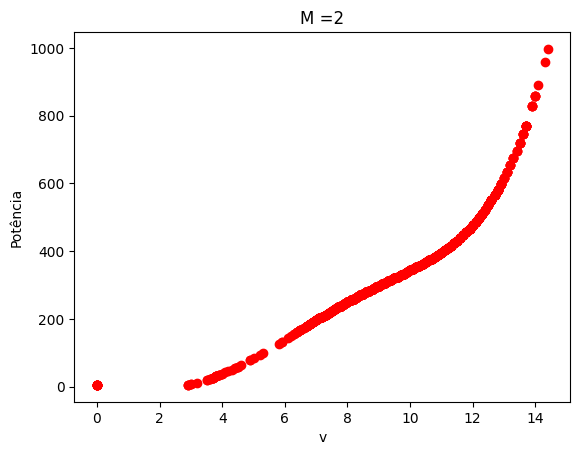

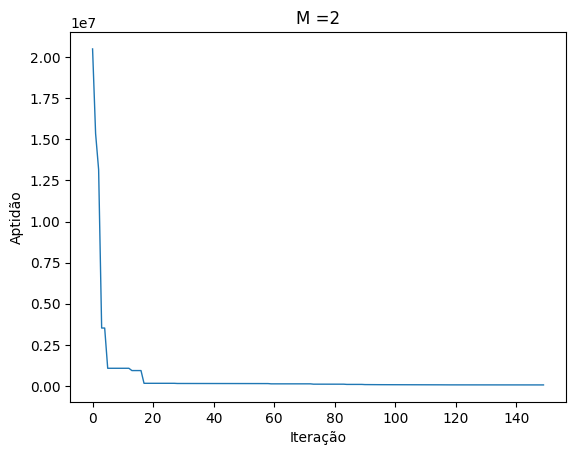

Melhor posição: [ 0.0365668  -0.86130186  5.93091088 -6.         -6.         -6.        ]
Melhor aptidão: 140584.85434233205


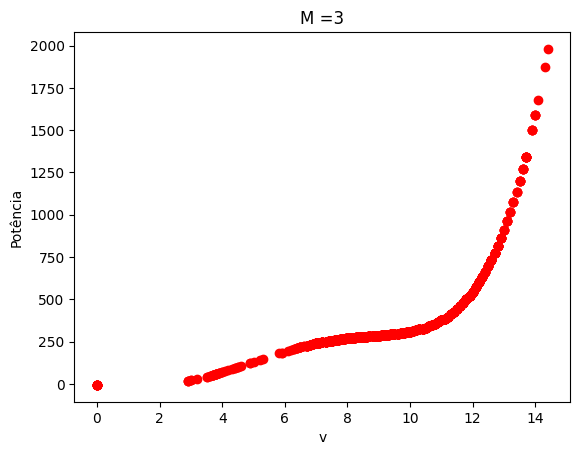

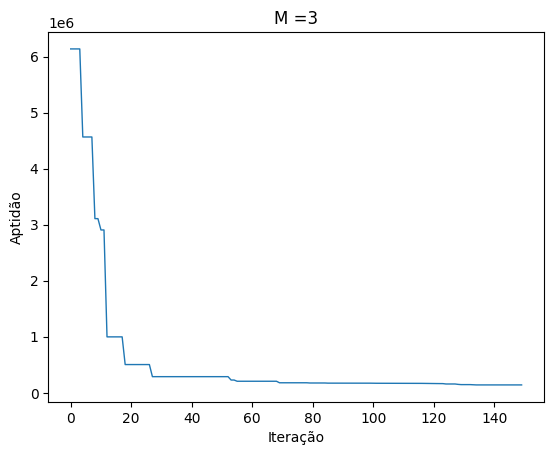

Melhor posição: [ 0.01916342 -0.34360076  0.85148491 10.         -3.02126489 -4.28692233]
Melhor aptidão: 138253.64106344018


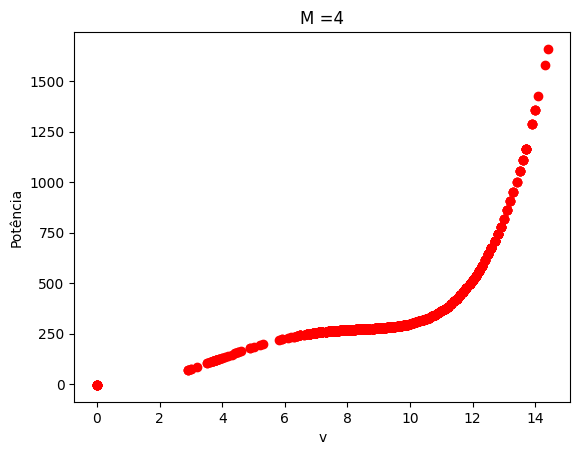

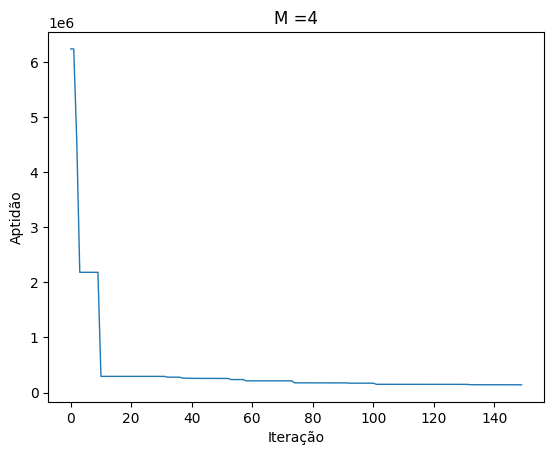

Melhor posição: [-0.0367098   0.81819377 -5.02493086 10.         -6.         -6.        ]
Melhor aptidão: 136097.31324710342


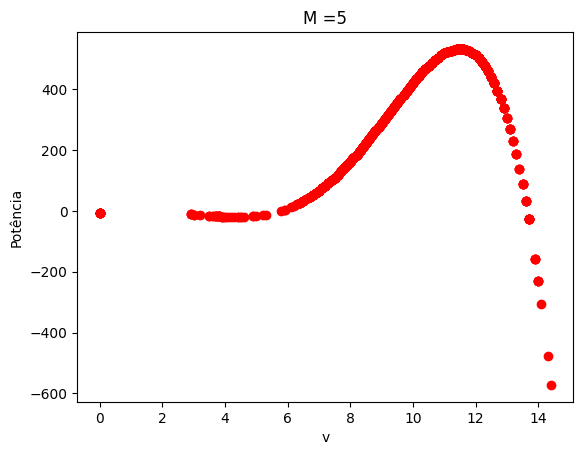

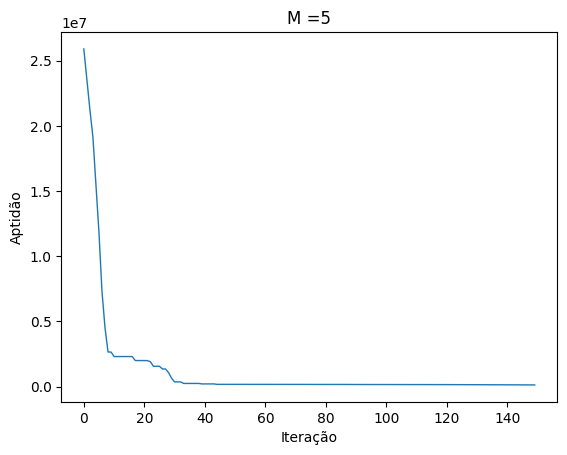

Melhor posição: [ 0.07384357 -1.64887802 10.         -6.         -6.         -6.        ]
Melhor aptidão: 312633.65005760296


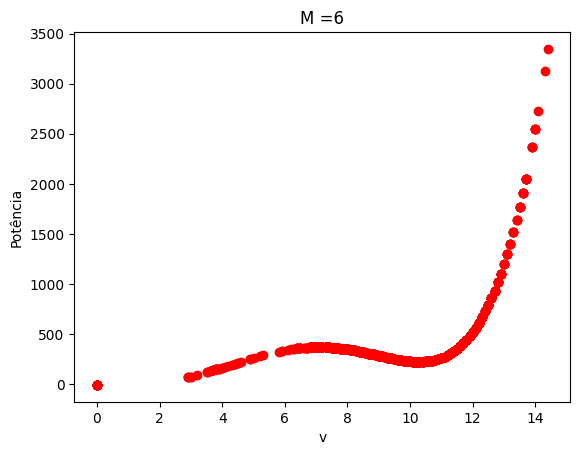

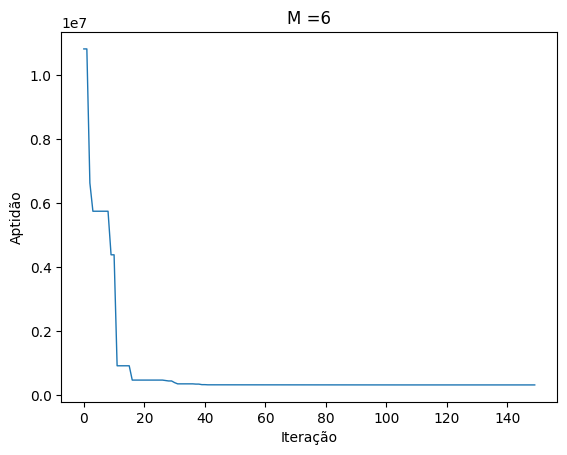

Melhor posição: [-7.38997014e-03  1.24920511e-01 -1.25033861e-01 -1.18985547e+00
  1.00000000e+01  1.40258680e+00]
Melhor aptidão: 31400.622344245276


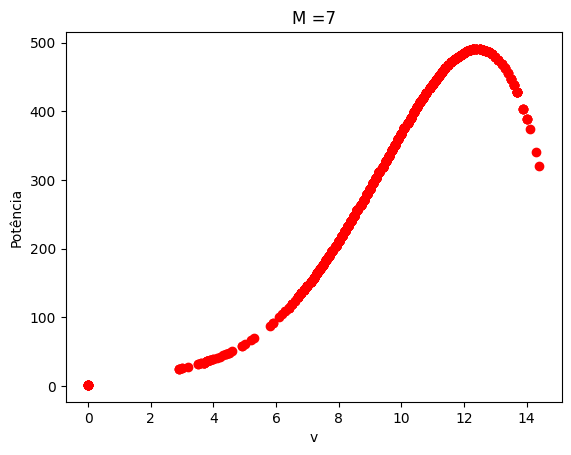

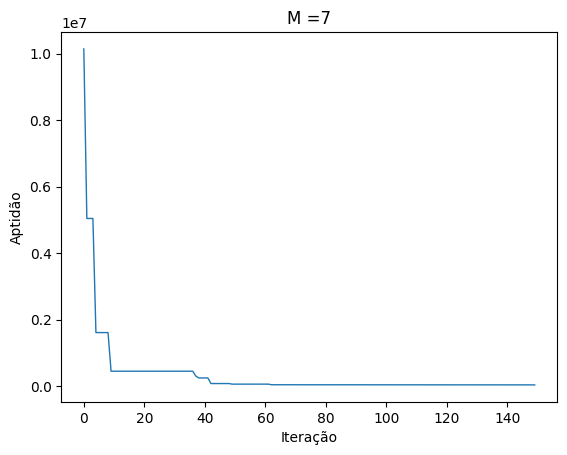

Melhor posição: [ 0.07379611 -1.64807004  9.99400224 -6.         -5.99999454 -5.99533778]
Melhor aptidão: 312412.4874665927


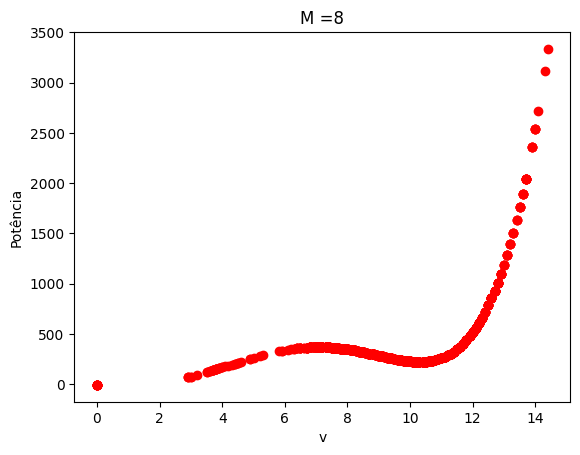

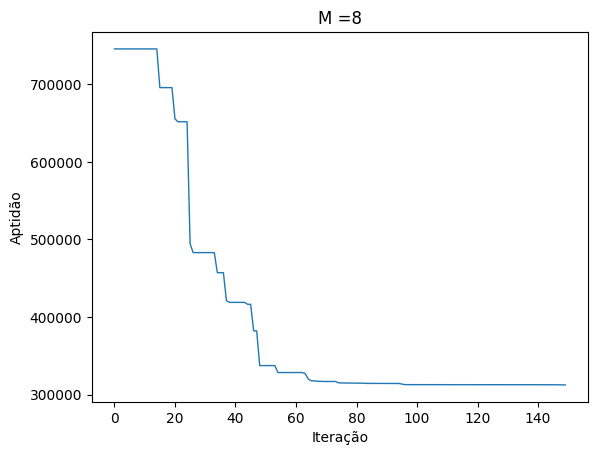

Melhor posição: [ 0.0736512  -1.64731823 10.         -6.         -6.         -6.        ]
Melhor aptidão: 312737.7064974366


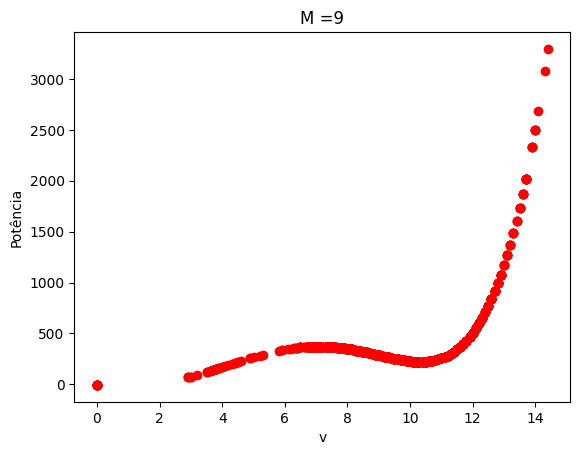

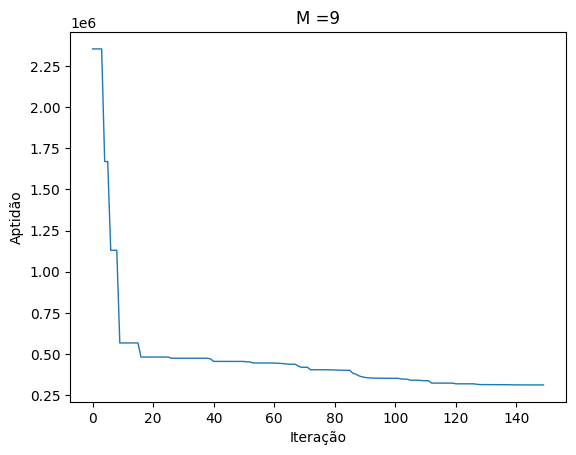

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

def pso_seq(b_aerogerador, v_aero, P):
    SEQ = []
    Ng = b_aerogerador.shape[0]
    for i in range(Ng):
        ypred = np.polyval(b_aerogerador[i, :], v_aero)
        y = P
        erro = y - ypred
        SEQ.append(np.sum(np.abs(erro)))
    F = SEQ
    return F

Ng = 150
Np = 80
c1 = 2.05
c2 = c1
w = 0.6
y = P
limites = [-6, 10]
k = 5
M = 10
data_values = []
coeficientes = []

for m in range(M):
    
    v = np.zeros((Np, 6))
    b_aerogerador = uniform.rvs(loc=limites[0], scale=limites[1] - limites[0], size=(Np, 6))
    
    b_best = b_aerogerador.copy()
    Fbest = pso_seq(b_best, v_aero, P)
    Fbest = np.array(Fbest)
    
    Fmin = np.min(Fbest)
    I = np.argmin(Fbest)
    g_best = b_best[I, :]
    
    aptidao = np.zeros(Ng)
    for t in range(Ng):
        iteracao = t
    
        Vcog = np.random.rand(Np, 6) * (b_best - b_aerogerador)
        Vsoc = np.random.rand(Np, 6) * (g_best - b_aerogerador)
    
        v = w * v + c1 * Vcog + c2 * Vsoc
        b_aerogerador = b_aerogerador + v
    
        b_aerogerador = np.clip(b_aerogerador, limites[0], limites[1])
    
        Fcand = pso_seq(b_aerogerador, v_aero, P)
        Fcand = np.array(Fcand)
        DF = np.array(Fcand) - np.array(Fbest)
        I_better = np.where(DF <= 0)[0]
        I_worse = np.where(DF > 0)[0]
    
        b_best[I_better] = b_aerogerador[I_better]
        Fbest[I_better] = Fcand[I_better]

        b_best[I_worse] = b_best[I_worse]
        Fbest[I_worse] = Fbest[I_worse]
        
        F_gbest = np.min(Fbest)
        I = np.argmin(Fbest)
        g_best = b_best[I, :]
    
        aptidao[t] = F_gbest

    ypred = np.polyval(g_best, v_aero)
    erro = y - ypred
    R2 = r2(y, erro)
    R2_ajustado = r2_ajustado(y, erro, len(y), k + 1)
    AIC = aic(v, k, erro)
    data_values.append((R2, R2_ajustado, AIC, m))
    coeficientes.append((g_best, m))
    
    print("Melhor posição:", g_best)
    print("Melhor aptidão:", F_gbest)
    
    ypred = np.polyval(g_best, v_aero)
    plt.figure()
    plt.plot(v_aero, ypred, 'ro')
    plt.xlabel('v')
    plt.ylabel('Potência')
    plt.title('M ={}'.format(m))
    
    plt.figure()
    plt.plot(aptidao, linewidth=1)
    plt.xlabel('Iteração')
    plt.ylabel('Aptidão')
    plt.title('M ={}'.format(m))
    
    plt.show()

In [52]:
# Cria o DataFrame com os valores de x, y e t e define os índices como os valores de k
data = pd.DataFrame(data_values, columns=['R2', 'R2_ajustado', 'AIC', 'M'], index=range(1, 11))
data

,R2,R2_ajustado,AIC,M
1,-0.926389,-0.931542,1425.267824,0
2,0.966649,0.966560,1100.763263,1
3,0.791910,0.791354,1247.233202,2
4,-0.608958,-0.613262,1410.862967,3
5,-0.111314,-0.114287,1381.259489,4
6,0.175664,0.173459,1357.361834,5
7,-4.859111,-4.874784,1514.255853,6
8,0.956918,0.956803,1121.243833,7
9,-4.800266,-4.815781,1513.448324,8
10,-4.649075,-4.664186,1511.335365,9


In [45]:
# Cria um novo DataFrame com os índices dos maiores e menores valores
new_data = {
    'maior_r2': data['R2'].idxmax(),
    'maior_r2_ajustado': data['R2_ajustado'].idxmax(),
    'menor_aic': data['AIC'].idxmin()
}

result_df = pd.DataFrame(new_data, index=[0])

result_df

,maior_r2,maior_r2_ajustado,menor_aic
0,2,2,2


In [55]:
# Cria o DataFrame com os valores de x, y e t e define os índices como os valores de k
coeficientes = pd.DataFrame(coeficientes, columns=['coeficientes', 'M'], index=range(1, 11))
coeficientes

,coeficientes,M
1,"[0.042155247944251836, -0.9958610729840981, 6....",NaN
2,"[-0.007226269360866892, 0.1975623572993284, -1...",NaN
3,"[0.017408084380356268, -0.47446481429582454, 3...",NaN
4,"[0.03656680321116836, -0.8613018561917136, 5.9...",NaN
5,"[0.019163424000272506, -0.343600762721701, 0.8...",NaN
6,"[-0.03670979713637328, 0.8181937710176791, -5....",NaN
7,"[0.07384357373065314, -1.6488780223971837, 10....",NaN
8,"[-0.00738997013784365, 0.12492051106248808, -0...",NaN
9,"[0.07379610907770949, -1.6480700438385092, 9.9...",NaN
10,"[0.07365120015010304, -1.6473182294976476, 10....",NaN


In [47]:
coeficientes_k0 = coeficientes.loc[coeficientes['K'] == 1]['coeficientes'].values[0]
coeficientes_k0

array([-7.22626936e-03,  1.97562357e-01, -1.84986262e+00,  1.00000000e+01,
       -6.00000000e+00,  9.24252517e+00])

In [48]:
# Calcule a norma euclidiana
norma = np.linalg.norm(coeficientes_k0)

print("Norma Euclidiana:", norma)

Norma Euclidiana: 14.996177726375223
